# Perkenalan

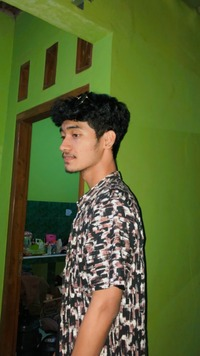

Nama : Fitrah Saputra,
Bergabung sejak 21 Sep 2021,
Alamat :  Kota Bandar Lampung, Lampung

In [145]:
import pandas as pd

df = pd.read_csv('bitcoin_articles.csv')
df = df.drop(columns=[
    'author', 'title', 'authors', 'country', 'language', 'excerpt',
    'article_id', 'published_date', 'link', 'clean_url', 'rights', 
    'article_rank', 'media', 'twitter_account', 'article_score'
])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  2473 non-null   object
 1   topic    2500 non-null   object
dtypes: object(2)
memory usage: 39.2+ KB


In [146]:
df.head()

,summary,topic
0,"Over the course of the last few years, there h...",finance
1,Russia Legalizing Bitcoin And Crypto Is A Matt...,news
2,Bitcoin has a maximum supply of 21 million. Ho...,news
3,"Conceived in 2008 and launched in 2009, bitcoi...",business
4,Bear markets are for building out capacity on ...,news


In [147]:
category = pd.get_dummies(df.topic)

df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns=['topic'])
df_baru['summary']=df_baru['summary'].fillna('').apply(str)
df_baru.head()

,summary,beauty,business,economics,energy,entertainment,finance,food,news,politics,science,sport,tech,world
0,"Over the course of the last few years, there h...",0,0,0,0,0,1,0,0,0,0,0,0,0
1,Russia Legalizing Bitcoin And Crypto Is A Matt...,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Bitcoin has a maximum supply of 21 million. Ho...,0,0,0,0,0,0,0,1,0,0,0,0,0
3,"Conceived in 2008 and launched in 2009, bitcoi...",0,1,0,0,0,0,0,0,0,0,0,0,0
4,Bear markets are for building out capacity on ...,0,0,0,0,0,0,0,1,0,0,0,0,0


In [148]:
summary = df_baru['summary'].values
label = df_baru[[
    'beauty', 'business', 'economics',
    'energy', 'entertainment',
    'finance', 'food', 'news',
    'politics', 'science', 'sport',
    'tech', 'world'
]].values

In [149]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("popular")

index = 0
while index < len(summary):
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  new_words = tokenizer.tokenize(str(summary[index]))
  new_words = " ".join(new_words)

  stop_words = set(stopwords.words('english'))
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  word_tokens = tokenizer.tokenize(new_words)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  summary[index] = " ".join(filtered_sentence)

  index = index+1

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [150]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(summary, label, test_size=0.2)

In [151]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='')
tokenizer.fit_on_texts(x_train)

sekuens_train = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [161]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('val_accuracy') > 0.84):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 84%!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=100),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(526, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(13, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, None, 100)         500000    
                                                                 
 lstm_19 (LSTM)              (None, 64)                42240     
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_63 (Dense)            (None, 128)               8320      
                                                                 
 dense_64 (Dense)            (None, 526)               67854     
                                                                 
 dense_65 (Dense)            (None, 256)               134912    
                                                                 
 dense_66 (Dense)            (None, 13)              

In [162]:
num_epochs = 50

history = model.fit(
    padded_train, y_train,
    steps_per_epoch = 10,
    epochs=num_epochs,
    validation_data=(padded_test, y_test),
    batch_size=32,
    validation_steps = 10,
    verbose=2,
    callbacks = [callbacks]
)

Epoch 1/50
10/10 - 5s - loss: 2.2829 - accuracy: 0.6719 - val_loss: 1.3494 - val_accuracy: 0.7875 - 5s/epoch - 484ms/step
Epoch 2/50
10/10 - 1s - loss: 0.9256 - accuracy: 0.8094 - val_loss: 0.7915 - val_accuracy: 0.7875 - 909ms/epoch - 91ms/step
Epoch 3/50
10/10 - 1s - loss: 0.7810 - accuracy: 0.7781 - val_loss: 0.7504 - val_accuracy: 0.7875 - 911ms/epoch - 91ms/step
Epoch 4/50
10/10 - 1s - loss: 0.7428 - accuracy: 0.7937 - val_loss: 0.7208 - val_accuracy: 0.7875 - 929ms/epoch - 93ms/step
Epoch 5/50
10/10 - 1s - loss: 0.6094 - accuracy: 0.8125 - val_loss: 0.7025 - val_accuracy: 0.7875 - 939ms/epoch - 94ms/step
Epoch 6/50
10/10 - 1s - loss: 0.6253 - accuracy: 0.7937 - val_loss: 0.6910 - val_accuracy: 0.7875 - 968ms/epoch - 97ms/step
Epoch 7/50
10/10 - 1s - loss: 0.5497 - accuracy: 0.8191 - val_loss: 0.6725 - val_accuracy: 0.7875 - 923ms/epoch - 92ms/step
Epoch 8/50
10/10 - 1s - loss: 0.5065 - accuracy: 0.8094 - val_loss: 0.6579 - val_accuracy: 0.7875 - 922ms/epoch - 92ms/step
Epoch 9/50

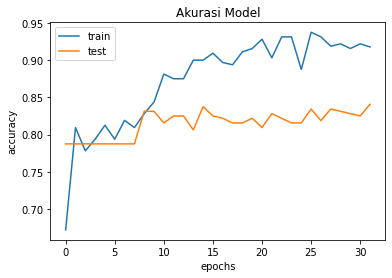

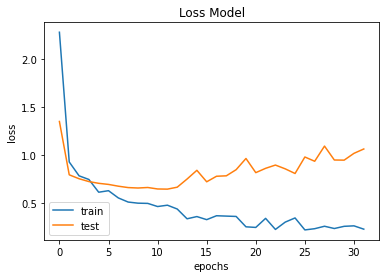

In [163]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower left')
plt.show()